In [1]:
import pandas as pd 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [5]:
train = pd.read_csv("train.csv", index_col="Id")
test = pd.read_csv("test.csv", index_col="Id")
ample_submission = pd.read_csv("sample_submission.csv", index_col="Id")
train.fillna(0,inplace=True)


In [6]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Breve análisis descriptivo de los datos

Veamos cómo leyó Python las variables:

In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Primeramente, si se realiza un histograma se puede inferir acerca de 
la distribución de los datos, por ejemplo, a continuación se realiza para aquellas variables que son categóricas, esto porque las variables numéricas 
sería mejor analizarlo con una matriz de correlación.

In [8]:
#Las variables que son object
import pandas as pd
import numpy as np
import copy
trainObj = train.select_dtypes(include=['object']).copy()
#trainObj.iloc[0:4,[0,8]]
#trainObj[].value_counts()
#train['MSSubClass'].value_counts()

<ipython-input-9-d937b5dcecfe>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


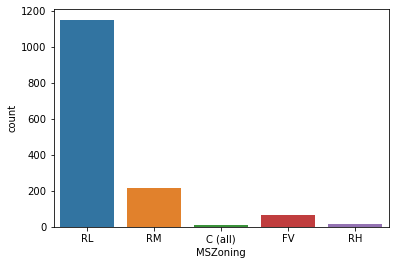

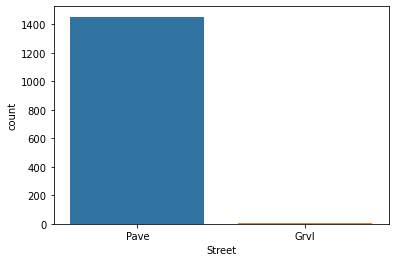

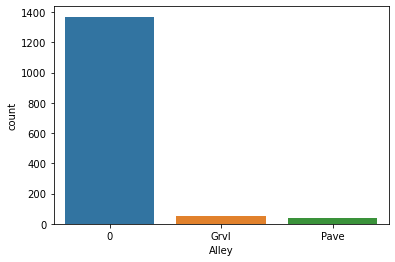

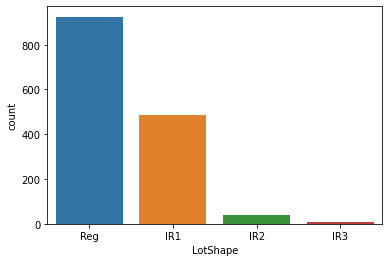

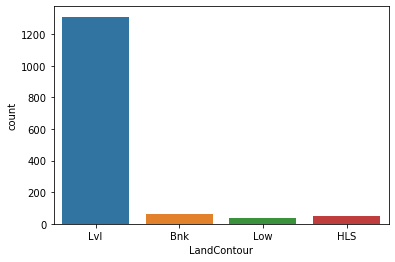

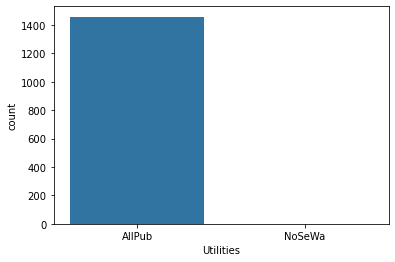

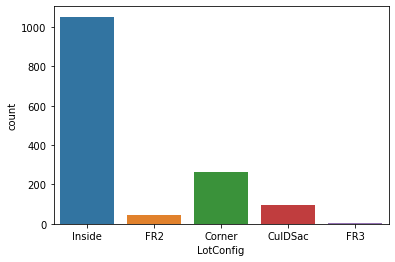

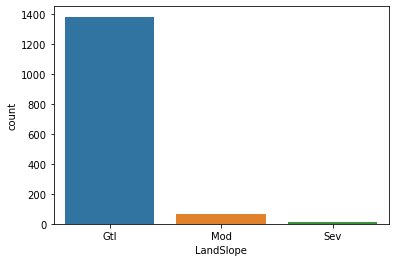

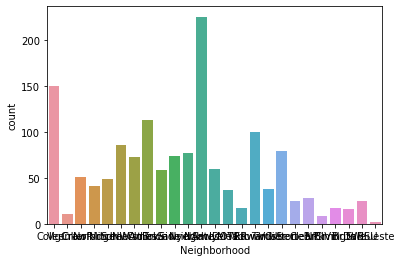

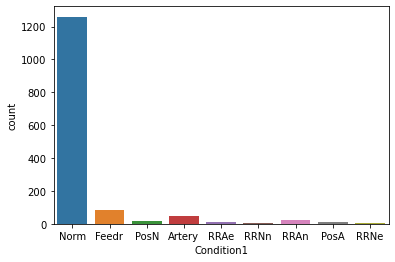

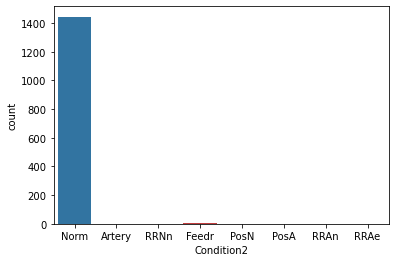

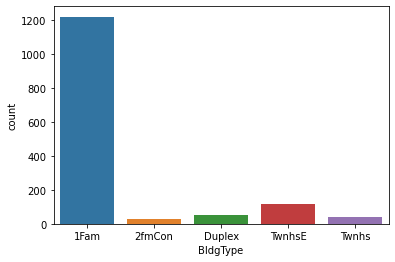

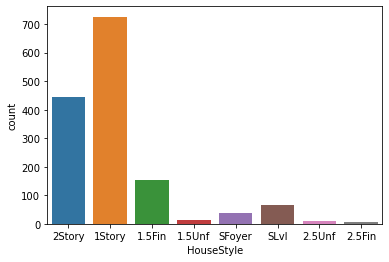

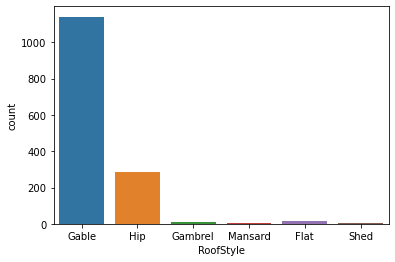

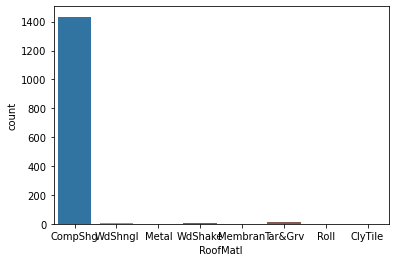

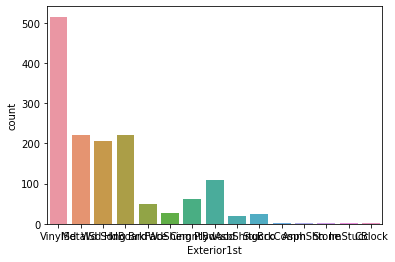

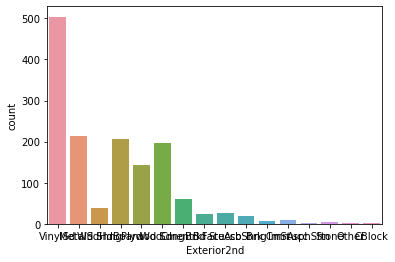

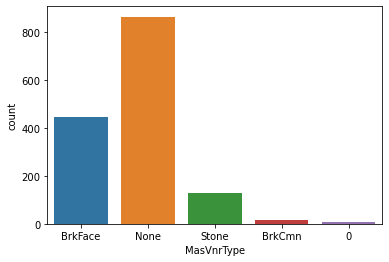

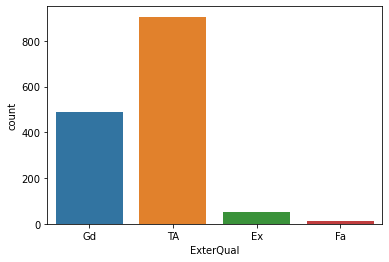

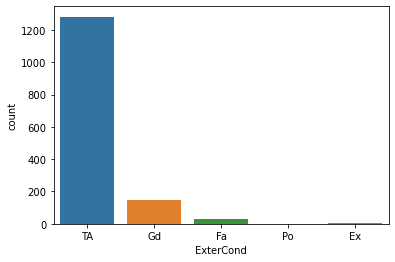

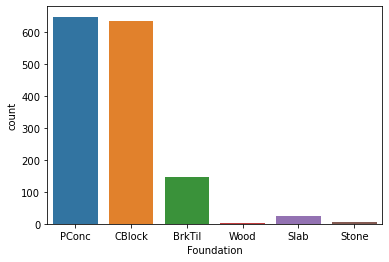

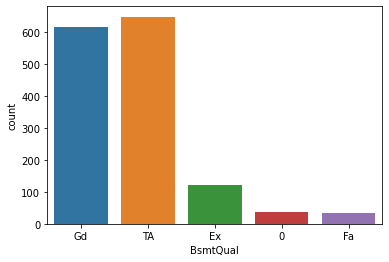

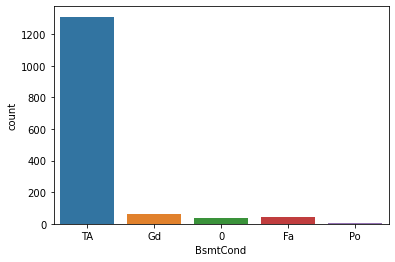

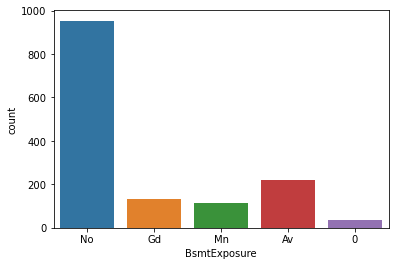

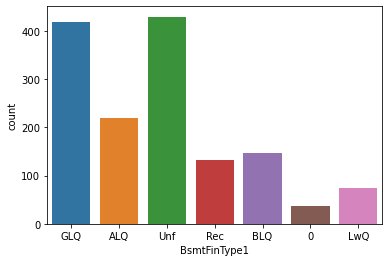

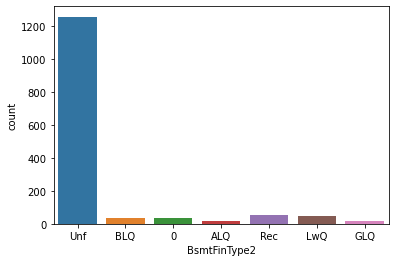

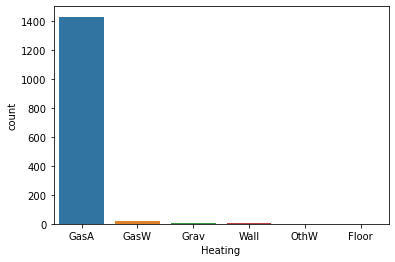

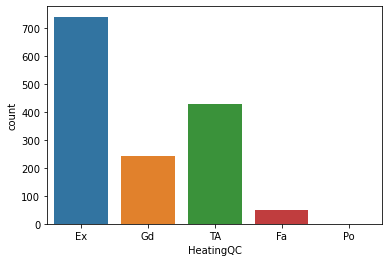

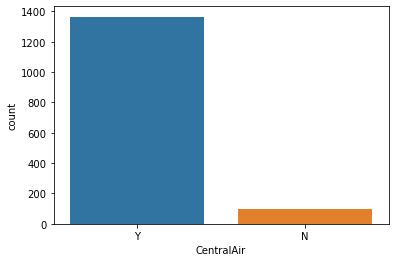

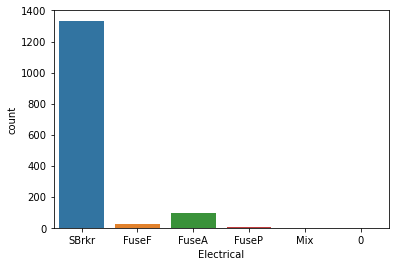

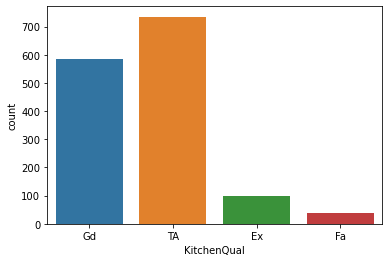

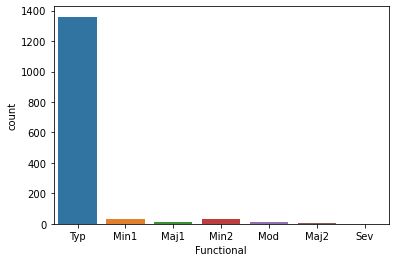

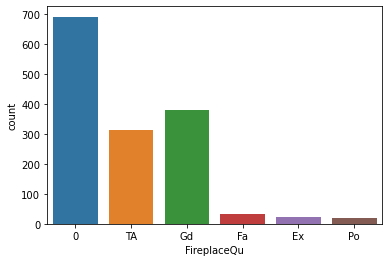

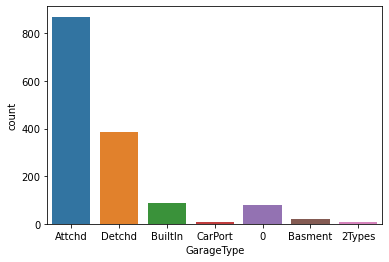

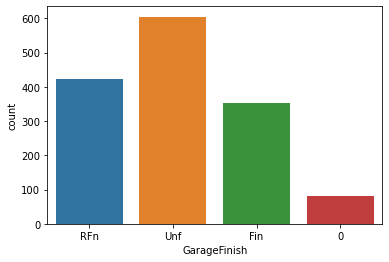

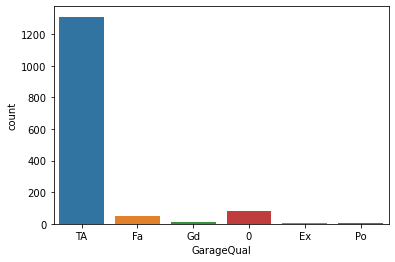

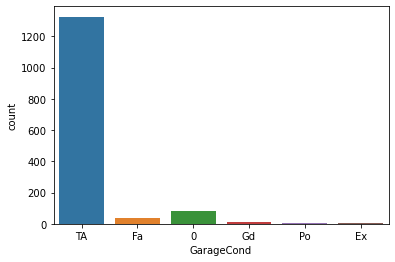

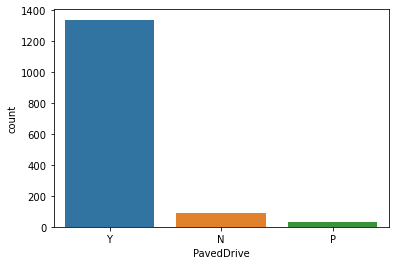

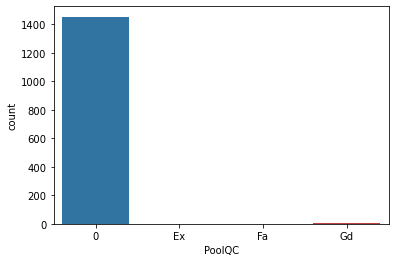

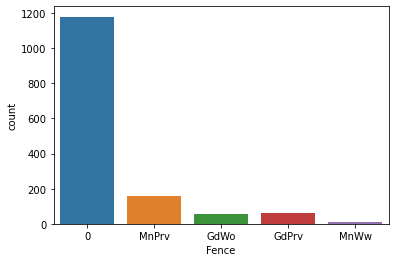

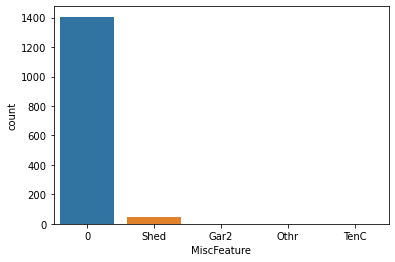

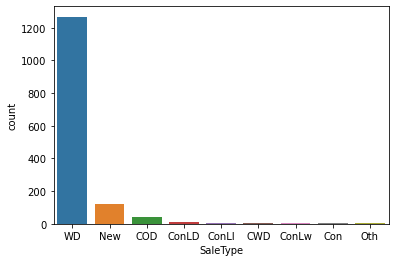

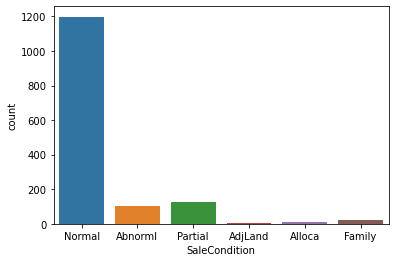

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
for i, col in enumerate(trainObj.columns):
    plt.figure(i)
    sns.countplot(x=col, data=trainObj)


In [ ]:
print(trainData.info())

Por definición de los datos la variable MSSubClass
aunque toma valores enteros realmente es una variable categórica,
pues indica el tipo de vivienda involucrada en la venta, por lo tanto,
debe trabajarse como variable catégorica y no numérica.


In [ ]:
trainData['MSSubClass'] = trainData['MSSubClass'].astype('category')

Ahora bien, la siguiente variable MSZoning por definición también es
categórica, sin embargo, deben redefinirse las categorías:
1 =       A	Agriculture, 
2 =       C	Commercial, 
3 =       FV	Floating Village Residential, 
4 =       I	Industrial, 
5 =       RH	Residential High Density, 
6 =       RL	Residential Low Density, 
7 =       RP	Residential Low Density Park, 
8 =       RM	Residential Medium Density


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

In [ ]:

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))